## November 12, 2021
https://fivethirtyeight.com/features/can-you-stick-it-to-the-genie/

In [82]:
import numpy as np
import math
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns

### Riddler Express
From Adam Milligan comes a puzzle about dice, dungeons and dragons (but mostly about dice):

I have three dice (d4, d6, d8) on my desk that I fiddle with while working, much to the chagrin of my co-workers. For the uninitiated, the d4 is a tetrahedron that is equally likely to land on any of its four faces (numbered 1 through 4), the d6 is a cube that is equally likely to land on any of its six faces (numbered 1 through 6), and the d8 is an octahedron that is equally likely to land on any of its eight faces (numbered 1 through 8).

I like to play a game in which I roll all three dice in “numerical” order: d4, then d6 and then d8. I win this game when the three rolls form a strictly increasing sequence (such as 2-4-7, but not 2-4-4). What is my probability of winning?

Extra credit: Instead of three dice, I now have six dice: d4, d6, d8, d10, d12 and d20. If I roll all six dice in “numerical” order, what is the probability I’ll get a strictly increasing sequence?

In [20]:
# Simulate Reality
# Play around with different number, the more trials you do the less variance you have
trials = 1000000

# np.random.randint(low, high, size, dtype=int) randomly selects an integer from the range [low, high), and repeats this `size` times
d4 = np.random.randint(low=1, high=5, size=trials, dtype=int)
d6 = np.random.randint(low=1, high=7, size=trials, dtype=int)
d8 = np.random.randint(low=1, high=9, size=trials, dtype=int)

# we now have 3 arrays of length `num_sims` and need to check if d4 < d6 < d8
success = 0
for i in range(trials):
    if d4[i] < d6[i] < d8[i]:
        success += 1
        
# Solution ~ 0.25, 1/4
print(success/trials)

0.250087


In [22]:
# Extra Credit
trials = 1000000

d4 = np.random.randint(low=1, high=5, size=trials, dtype=int)
d6 = np.random.randint(low=1, high=7, size=trials, dtype=int)
d8 = np.random.randint(low=1, high=9, size=trials, dtype=int)
d10 = np.random.randint(low=1, high=11, size=trials, dtype=int)
d12 = np.random.randint(low=1, high=13, size=trials, dtype=int)
d20 = np.random.randint(low=1, high=21, size=trials, dtype=int)

success = 0
for i in range(trials):
    if d4[i] < d6[i] < d8[i] < d10[i] < d12[i] < d20[i]:
        success += 1

# Solution ~ .011741
print(success/trials)

0.011741


#### Mathematical Explanation

Simulating reality is a very effective way to get the correct answer. Sometimes proving things are significantly more difficult than just sampling from reality - here is a question to help prove my point: 6 people started working together, and every day they randomly split into pairs and get lunch with each other. On average, how many days before they each get lunch with each other? What if you begin with 8 people?

However, we can also derive the answer to this question analytically, and it shouldn't be as messy as the problem I described above. We can think about all possible combinations that may occur. $ 4 * 6 * 8 = 192 $ outcomes.

Let us just consider 2 dice for now, the d4 and d6

If we roll a 1 on the d4 die, then we on the d6 die we can roll a 2, 3, 4, 5, 6  
If we roll a 2 on the d4 die, then we on the d6 die we can roll a 3, 4, 5, 6  
If we roll a 3 on the d4 die, then we on the d6 die we can roll a 4, 5, 6  
If we roll a 4 on the d4 die, then we on the d6 die we can roll a 5, 6  

All possible successes denoted d4d6 are: 12, 13, 14, 15, 16, 23, 24, 25, 26, 34, 35, 36, 45, 46 (14 possible solutions)
All possible outcomes are 4 * 6 = 24

So the answer is 14/24, but maybe we can rewrite this into some equation that will generalize when we add more dice?

Let us try and write the possible successes as a summation. If we roll _i_ on the d4 die, then we can roll _i+1_ on the d6 die:

$$ { \frac{\sum_{i=1}^4\sum_{j=i+1}^61}{4 * 6}} $$

We include a 1 because we want to a count of possible solutions. Let's program this equation in python and see what we get.

In [60]:
# define the number of sides on each die
d4, d6 = 4, 6

# define the number of successes and outcomes
successes = 0
outcomes = d4 * d6

# range is [start, stop), where start is included and stop is excluded, which is why we need to add 1
for i in range(1, d4+1):
    for j in range(i+1, d6+1):
        successes += 1

print(f"Successess: {successes}, Outcomes: {outcomes} \nProbability of Ascending with d4 and d6 dice: {successes/outcomes:.2f}")

Successess: 14, Outcomes: 24 
Probability of Ascending with d4 and d6 dice: 0.58


Awesome, we solved a simpler problem, now how do we add in a third dice?

roll 1 on the d4 die, roll 2 on the d6 die, on the d8 die we can roll 3, 4, 5, 6, 7, 8  
roll 1 on the d4 die, roll 3 on the d6 die, on the d8 die we can roll 4, 5, 6, 7, 8  
roll 1 on the d4 die, roll 4 on the d6 die, on the d8 die we can roll 5, 6, 7, 8  
roll 1 on the d4 die, roll 5 on the d6 die, on the d8 die we can roll 6, 7, 8  
roll 1 on the d4 die, roll 6 on the d6 die, on the d8 die we can roll 7, 8  

roll 2 on the d4 die, roll 3 on the d6 die, on the d8 die we can roll 4, 5, 6, 7, 8  
roll 2 on the d4 die, roll 4 on the d6 die, on the d8 die we can roll 5, 6, 7, 8  
roll 2 on the d4 die, roll 5 on the d6 die, on the d8 die we can roll 6, 7, 8  
roll 2 on the d4 die, roll 6 on the d6 die, on the d8 die we can roll 7, 8  

Do you notice a pattern for the d6 and d8 dice that is similar to the d4 and d6 dice we did in the previous example? You might notice that we can write another summation - the d6 die has to be at least 1 larger than the d4 die, and the d8 die has to be at least 1 larger than the d6 die.

$$ { \frac{\sum_{i=1}^4\sum_{j=i+1}^6\sum_{k=j+1}^81}{4 * 6 * 8}} $$


In [59]:
# Given we are going to run the same code at least twice more, let's write a function!

# we use d1, d2, d3 denote die 1, 2, and 3, and the integer we pass in represents the number of sides
def probability_increasing(d1: int = 4, d2: int = 6, d3: int = 8) -> float:
    successes = 0
    for i in range(1, d1+1):
        for j in range(i+1, d2+1):
            for k in range(j+1, d3+1):
                successes += 1
    return successes / (d1 * d2 * d3)

probability_increasing(4, 6, 8)

0.25

Hey look, we got 0.25, which is what the same answer we got by simulating dice rolls in the first place! Awesome, now how do we mathematically prove the extra credit? We just continue the chain summation!

$$ { \frac{\sum_{i=1}^4\sum_{j=i+1}^6\sum_{k=j+1}^8\sum_{x=k+1}^{10}\sum_{y=x+1}^{12}\sum_{z=y+1}^{20}1}{4 * 6 * 8 * 10 * 12 * 20}} $$

In [67]:
# Notice how our function doesn't actually work for this, we want to specify a variable amount of dice, how can we do that?
# There is a special argument we can pass into our function called `*args` which is useful for this exact scenario
# `*args` lets us pass in as many arguments as we want, we just need to know how to handle all this inputs in the function itself

# example of what `*args` is exactly, feel free to play around with the input
# def ex(*args):
#     print(args)
#     for arg in args:
#         print(arg)
# ex(1, 2, 3, "string")


# we know args will basically be a list of integers, where the integer represents the face of a die
# I figured there must be some way to handle any number of inputs, which there most definitely is, but the solution eludes me right now
# def probability_n_increasing(*args):
d1, d2, d3, d4, d5, d6 = 4, 6, 8, 10, 12, 20
successes = 0
for i in range(1, d1+1):
    for j in range(i+1, d2+1):
        for k in range(j+1, d3+1):
            for x in range(k+1, d4+1):
                for y in range(x+1, d5+1):
                    for z in range(y+1, d6+1):
                        successes += 1
successes / (d1 * d2 * d3 * d4 * d5 * d6)
# you can see the analytical solution is quite similar to the simulated solution

0.011792534722222222

### Riddler Classic
One day you stumble across a magic genie, who says that if you play a simple game with him, you could win fabulous riches. You take the genie up on his offer, and he hands you a stick of length 1. He says that behind his back is another stick, with a random length between 0 and 1 (chosen uniformly over that interval).

Next, you must break your stick into two pieces and present one of those pieces to the genie. If that piece is longer than the genie’s hidden stick, then you win a prize of \\$1 million times the length of your remaining piece. For example, if you present to the genie a length of 0.4, and that’s longer than the genie’s stick, then you win \\$1 million times 0.6, or \\$600,000. However, if the genie’s stick is longer, then you win nothing.

Being a regular reader of The Riddler, you crunch some numbers and prepare to break your stick in half. But then you have a thought. You ask the genie if you can have more than one turn. For example, if you present the genie with a length of 0.4, but the genie’s stick is longer, can you break off a piece of the remaining length of 0.6 — say, a length of 0.5 — and then present that to the genie? To keep things fair, your winnings will still be proportional to the leftover length. So had the genie’s length indeed been between 0.4 and 0.5, your first and second guesses, then the remaining length would have been 0.1, and you would have won \\$100,000.

The genie doesn’t think any of this really matters and says you can have as many turns as you desire. If your goal is to maximize your expected winnings, what will your strategy be? And how much money would you expect to win on average?

In [47]:
# let us simulate trials where we only break once down the 
def sim_stick_break(stick: float, trials: int = 50_000) -> float:
    reward = 0
    for _ in range(trials):
        g_stick = np.random.uniform(low=0, high=1)
        if stick > g_stick:
            reward += (1 - stick) * (1_000_000)
    return reward / trials

In [63]:
# play around with the value of the slider and run the next cell
stick_length = widgets.FloatSlider(value=0.3, min=0, max=1.0, step=0.01)
display(stick_length)

FloatSlider(value=0.5, max=1.0, step=0.01)

In [ ]:
sim_stick_break(stick_length.value)

210028.0

0.1 has an expected reward ~ 90k  
0.2 has an expected reward ~ 160k  
0.3 has an expected reward ~ 210k  
0.4 has an expected reward ~ 240k  
0.5 has an expected reward ~ 250k  
0.6 has an expected reward ~ 240k  
0.7 has an expected reward ~ 210k  
0.8 has an expected reward ~ 160k  
0.9 has an expected reward ~ 90k  

We could have just used a for loop, but the goal was to start at some value and drag the slider towards the max. Does choosing a stick of shorter length with two splits yield a better expected reward, and if so what is optimal? If we hold the stick fixed at length 0.4, then we need to get an expected reward of more than 10k to improve upon the solution of splitting the stick at length 0.5. So in the given example, if we split our stick into lengths 0.4 and 0.6, and g_stick > 0.4, then we split 0.6 into 0.5 and 0.1. Does this produce an expected reward greater than 10k (which is what we would nee to improve upon the 0.5 length stick)? We know g_stick > 0.4, so we only have 0.2 length of stick to play with. 

We know that 4/10 of the time we get 600k. 1/10 of the time we get 100k and 1/2 of the time we get nothing. So the analytical expected value is 240k + 10k = 250k. Would you look at that we do not improve but we do break even! What about if we split the stick so that we had lengths 0.45 and 0.15. Then 4/10 of the time we get 600k, 1/20 we get 150k, and 11/20 of the time we get nothing. The expected value decreases now because 240k + 7.5k = 247.5k < 250k.

What about 0.3 let's break the remaining stick of length 0.7 into length 0.5 and 0.2. Then we get 3/10 of the time 700k, 2/10 we get 200k, 1/2 of the time we get nothing, so 210k + 40k = 250k, which again is the same as splitting it down the middle initially.  

There is no way to improve upon the 250k expected value, but it does not matter what you choose initially, as long as the stick you give is less than or equal to length 0.5 because then you can always split the stick again to length 0.5 and whatever remainder you have left. In fact you can split the stick infinite amount of time so long as you end with a stick of length 0.5 you will have the same expected value.  

In the one break scenario, P was the probability that your stick was greater than the genie's stick, and (1-P)\*1,000,000 was the reward for winning. That means we were trying to maximize the expected reward which had the equation P \* (1-P) \* 1,000,000. You can graph this to see where the maximum occurs, or you can take the derivative with respect to P and set it to zero to find a local min/max. 

$$ { 0 = \frac{d}{dP} \left( P\left(1-P\right) \right) } $$
$$ { 0 = \frac{d}{dP} \left( P-P^2 \right) } $$
$$ { 0 = 1-2P } $$
$$ { P = \frac{1}{2} } $$

Now is this a local min or max? If you take the second derivative, you see that -2 < 0, so the function is concave down, which means that P = 0.5 is a local max.  

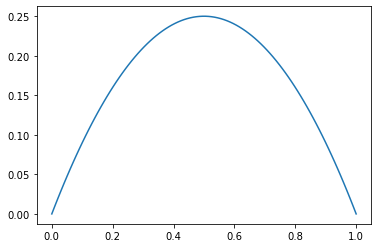

In [85]:
# graphing the equation P * (1-P)
x = np.linspace(start=0, stop=1, num=100)
y = x*(1-x)
sns.lineplot(x=x, y=y)
plt.show()

So what happens for the case of two breaks. Well let's call the first break P and the second break Q.  
P*(1-P) wins if P > g_stick. If P < g_stick, then we have Q*(1-P-Q).
So the expected reward is 

$$ P*(1-P)+(Q-P)*(1-P-Q) = P-P*P+Q-QP-Q*Q-P+P*P+QP $$
$$ = Q-Q*Q $$
$$ = Q*(1-Q) $$

If you take the derivative with respect to Q, you get that Q = 0.5, the exact same way we solved for the one break problem. This process will repeat recursively! As long as you end with some stick being of length 0.5, then your expected value will be the same as if you started with breaking the stick at 0.5 in the first place.